In [1]:
# install tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
# load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#The pixel values of the images are divided by 255.0 to scale them to the range [0, 1].
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [13]:
# Build the model

# Sequential model is a linear stack of layers
model = tf.keras.models.Sequential([

  # Flatten layer converts each 28x28 2D image into a 1D array of 784 pixels
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Dense layer with 128 neurons and ReLU activation function
  tf.keras.layers.Dense(128, activation='relu'),

  # Dropout layer to prevent overfitting by randomly setting 20% of the inputs to 0 during training
  tf.keras.layers.Dropout(0.2),

  # Output Dense layer with 10 neurons (one for each class) and Softmax activation function
  # Softmax converts the logits to probabilities that sum to 1
  tf.keras.layers.Dense(10, activation='softmax')
])


In [14]:
# Compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2920 - accuracy: 0.9152 - val_loss: 0.1384 - val_accuracy: 0.9602
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1425 - accuracy: 0.9582 - val_loss: 0.1077 - val_accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.0867 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0855 - accuracy: 0.9738 - val_loss: 0.0768 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 0.0708 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0630 - accuracy: 0.9800 - val_loss: 0.0682 - val_accuracy: 0.9798
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0575 - accuracy: 0.9811 - val_loss: 0.0653 - val_accuracy:

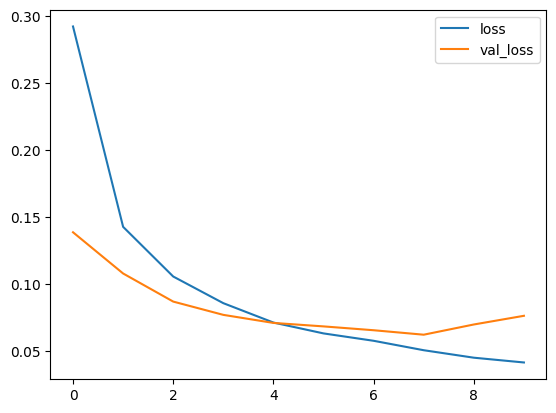

In [16]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

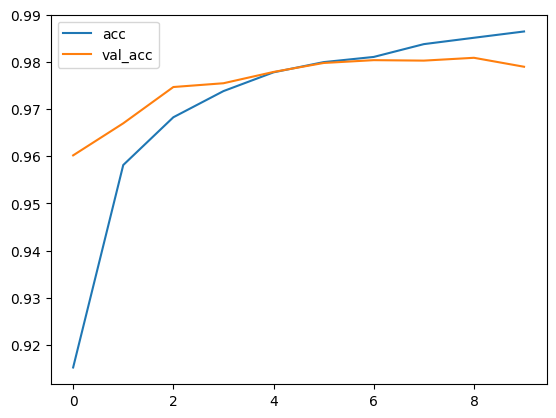

In [17]:
# Plit the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9790
[0.07612153887748718, 0.9789999723434448]


313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 969    0    3    0    1    2    2    1    2    0]
 [   0 1124    4    1    0    0    3    1    2    0]
 [   3    0 1017    0    0    0    4    5    2    1]
 [   0    0    4  988    0    8    0    3    3    4]
 [   1    0    2    1  954    0    7    0    0   17]
 [   2    0    0    4    1  872    8    1    3    1]
 [   4    2    0    1    2    2  946    0    1    0]
 [   1    4   11    1    0    0    0 1005    1    5]
 [   6    1    3    9    3    7    5    7  932    1]
 [   0    2    0    5    9    3    0    7    0  983]]


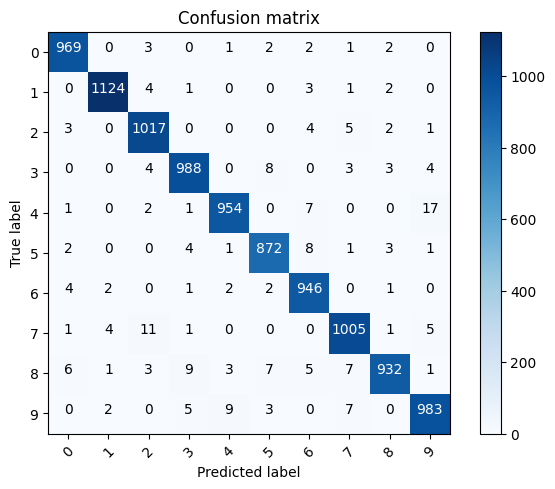

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

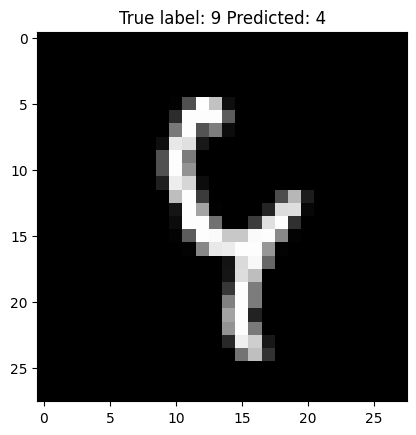

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));